# Upper Confidence Bound (UCB)

## Importing the libraries

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [32]:
dataset = pd.read_csv('Ads_CTR_Optimisation.csv')

## Implementing UCB

In [33]:
import math

num_of_selections = [0] * 10
sums_of_rewards = [0] * 10
N = 1000
d = 10
ads_selected = []
total_reward = 0

for n in range(N):
  ad = 0
  max_upper_bound = 0
  for k in range(d):
    if num_of_selections[k] > 0:
      average_reward = sums_of_rewards[k] / num_of_selections[k]
      delta_k = (((3/2) * math.log(n + 1)) / num_of_selections[k]) ** 0.5
      upper_bound = average_reward + delta_k
    else:
      upper_bound = 1e400
    if upper_bound > max_upper_bound:
      max_upper_bound = upper_bound
      ad = k
  ads_selected.append(ad)
  num_of_selections[ad] += 1
  reward = dataset.values[n, ad]
  sums_of_rewards[ad] = sums_of_rewards[ad] + reward
  total_reward += reward


## Visualising the results

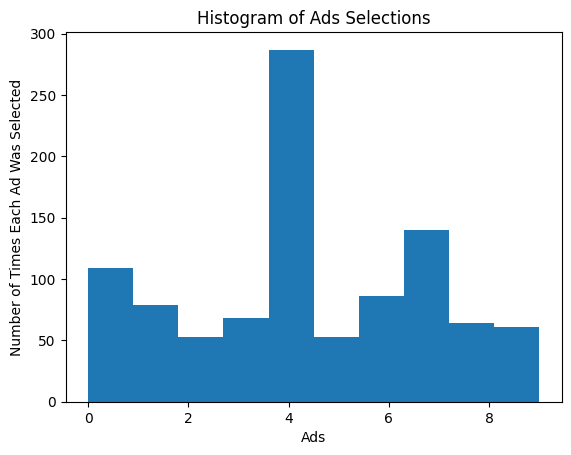

In [34]:
plt.hist(ads_selected)
plt.title('Histogram of Ads Selections')
plt.xlabel('Ads')
plt.ylabel('Number of Times Each Ad Was Selected')
plt.show()
